# GHZ state in MPS form
created by Viet Tran(v.thuongt@googlemail.com)

In [1]:
using ITensors
using LinearAlgebra
using ITensorUnicodePlots


We will now construct an MPS representation of the GHZ state for 4 qubits. Initially, we will express the ket vector in the computation basis. Then, we will transform the GHZ state into a tensor product representation using matrices. The MPS will be explicitly generated in ITensor, and we will contrast this approach with an alternative method that relies on bra-ket notation in ITensor. Finally, we will validate our approaches by converting the MPS into a vector and comparing it with the original ket vector in the computational basis.

## GHZ in computational basis representation

The GHZ state is a famous quantum state with interesting entanglement properties which however are not the focus of this notebook. The general form is as follows
$$
|\mathrm{GHZ}\rangle = \frac{|0\rangle^{\otimes M} + |1\rangle^{\otimes M}}{\sqrt{2}}.
$$
In our example we will just consider the unnormalized 4 qubit GHZ state $|\mathrm{GHZ}\rangle = |0000\rangle+ |1111\rangle$ but everything can be easily extended to higher number of qubits. We will use the usual compuational basis representation and will represent $|0\rangle := \begin{pmatrix} 1 \\ 0 \end{pmatrix}$ and $|1\rangle := \begin{pmatrix} 0 \\ 1 \end{pmatrix}$. 

To represent the 4-qubit system we will have to compute the tensor products:

$$|0000\rangle = |0\rangle \otimes |0\rangle \otimes |0\rangle \otimes |0\rangle = \begin{pmatrix} 1 \\ 0 \\ \vdots \\ 0 \end{pmatrix} \in \mathbb{C}^{16}$$

$$|1111\rangle = |1\rangle \otimes |1\rangle \otimes |1\rangle \otimes |1\rangle = \begin{pmatrix} 0 \\ \vdots \\ 0 \\ 1 \end{pmatrix} \in \mathbb{C}^{16}$$

Thus we can write the GHZ state as:
$$|\mathrm{GHZ}\rangle =  \begin{pmatrix} 1 \\ 0 \\ \vdots \\ 0 \\ 1 \end{pmatrix} \in \mathbb{C}^{16} $$



## Explicit MPS construction

First we will prepare the 4 qubit sites and create a random mps which we will overwrite with our own tensors.

In [2]:
n = 4
s = siteinds("Qubit",n)
@show s

s = Index{Int64}[(dim=2|id=896|"Qubit,Site,n=1"), (dim=2|id=527|"Qubit,Site,n=2"), (dim=2|id=900|"Qubit,Site,n=3"), (dim=2|id=492|"Qubit,Site,n=4")]


4-element Vector{Index{Int64}}:
 (dim=2|id=896|"Qubit,Site,n=1")
 (dim=2|id=527|"Qubit,Site,n=2")
 (dim=2|id=900|"Qubit,Site,n=3")
 (dim=2|id=492|"Qubit,Site,n=4")

In [3]:
# create the random mps to have physical site indices and virtual link inidces in place
mps = randomMPS(s, linkdims=2)

MPS
[1] ((dim=2|id=896|"Qubit,Site,n=1"), (dim=2|id=872|"Link,l=1"))
[2] ((dim=2|id=872|"Link,l=1"), (dim=2|id=527|"Qubit,Site,n=2"), (dim=2|id=529|"Link,l=2"))
[3] ((dim=2|id=529|"Link,l=2"), (dim=2|id=900|"Qubit,Site,n=3"), (dim=2|id=702|"Link,l=3"))
[4] ((dim=2|id=702|"Link,l=3"), (dim=2|id=492|"Qubit,Site,n=4"))


See the [Wikipedia entry](https://en.wikipedia.org/wiki/Matrix_product_state#Greenberger%E2%80%93Horne%E2%80%93Zeilinger_state) for the MPS form of the GHZ state. We will derive this form following [theses lecture notes p.19](https://tu-dresden.de/mn/physik/itp/ket/ressourcen/dateien/teach_folder/ss2021/skript/Lecture4.pdf?lang=en)

$$
\begin{aligned}
|\mathrm{GHZ}\rangle &= |0000\rangle + |1111\rangle \\
&= |\begin{pmatrix} |0\rangle_1 & |1\rangle_1 \end{pmatrix} \begin{pmatrix} |0\rangle_2 & 0 \\ 0 & |1\rangle_2 \end{pmatrix}  \begin{pmatrix} |0\rangle_3 & 0 \\ 0 & |1\rangle_3 \end{pmatrix} \begin{pmatrix} |0\rangle_4 \\ |1\rangle_4 \end{pmatrix}
\end{aligned}
$$ 
Note that the product of ket vectors is shorthand for the tensorproduct. In this form we can see the 4 tensors for the 4 qubit sites. If we define the MPS form as usual: 
$$|\mathrm{GHZ}\rangle = \sum_{s_1 \dots s_4} A^{s_1}A^{s_2}A^{s_3}A^{s_4}|s_1 s_2 s_3 s_4 \rangle $$

We can write the first site tensor $A^{s_1}$ as follows:
$$A^{s_1=0} = \begin{pmatrix} 1 & 0 \end{pmatrix} \quad\text{and}\quad A^{s_1=1} = \begin{pmatrix} 0 & 1 \end{pmatrix}.$$
Here $A^{s_1=0}$ and $A^{s_1=1}$ are the slices of the first site tensor $A^{s_1}$ for when the physical site index $s_1$ is either 0 or 1:
<div style="margin-left:auto; margin-right:auto; width:300px;">
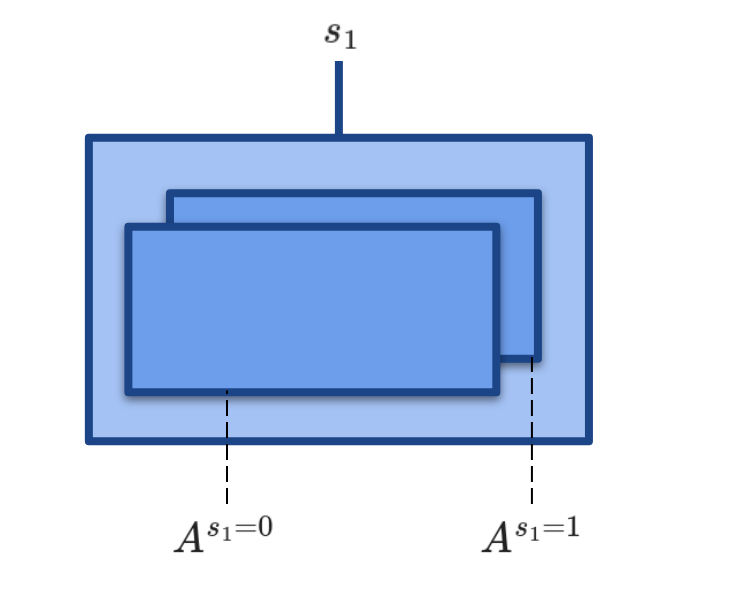
</div>

Analogously we rewrite the last site tensor $A^{s_4}$ as follows:
$$A^{s_4=0} = \begin{pmatrix} 1 \\ 0 \end{pmatrix} \quad\text{and}\quad A^{s_4=1} = \begin{pmatrix} 0 \\ 1 \end{pmatrix}.$$

For sites $s_2$ and $s_3$ the slices have the shape as given in wikipedia:
$$A^{s_i=0} = \begin{pmatrix} 1 & 0\\ 0 & 0 \end{pmatrix} \quad \text{and} \quad A^{s_i=1} = \begin{pmatrix} 0 & 0\\ 0 & 1 \end{pmatrix}, \quad \text{for}\quad i=2,3$$

We can quickly check the coefficient of the state $|0000\rangle = |s_1=0, s_2=0, s_3=0, s_4=0\rangle$ which would be $$A^{s_1=0} A^{s_2=0} A^{s_3=0} A^{s_4=0} =  \begin{pmatrix} 1 & 0 \end{pmatrix} \begin{pmatrix} 1 & 0 \\ 0 & 0 \end{pmatrix} \begin{pmatrix} 1 & 0 \\ 0 & 0 \end{pmatrix} \begin{pmatrix} 1 \\ 0 \end{pmatrix} = 1 .$$ 
Equally we can check that all other combinations of $s_1 \dots s_4$ will result in a 0 coefficient except for $|1111\rangle$. Thus we correctly found a MPS representation for the 4 qubit GHZ state. 

In [4]:
# for MPS form GHZ state see https://en.wikipedia.org/wiki/Matrix_product_state#Greenberger%E2%80%93Horne%E2%80%93Zeilinger_state 
# A0 = [1 0; 0 0]
# A1 = [0 0; 0 1]
# matrices A0 and A1 are slices of the tensor at site 2,...,N-1
# tensor at site 1 is 1x2x2  and contains [1 0] and [0 1]
# tensor at site N is 2x1x1 and contains [1; 0] and [0; 1]


@show mps[1] # tensor at site 1 gives ITensor ord=2 (dim=2|id=697|"Qubit,Site,n=1") (dim=2|id=843|"Link,l=1")
# thus create tensor at site 1, with physical index first then link index
T1 = ITensor([1 0; 0 1], inds(mps[1])) # inds(mps[1]) gets the physical and link index of the tensor at site 1
mps[1] = T1 # replace tensor at site 1 with T1


@show mps[4] # tensor at site 4 gives ITensor ord=2 (dim=2|id=56|"Link,l=3") (dim=2|id=19|"Qubit,Site,n=4")
# thus create tensor at site N, with link index first then physical index
TN = ITensor([1 0; 0 1], inds(mps[end])) # inds(mps[end]) gets the physical and link index of the tensor at site N
mps[end] = TN # replace tensor at site N with TN


# for inbetween tensors we set them to tensor with A1 and A0 slices
Tk = zeros(Float64, 2, 2, 2) # 2x2x2 tensor
# indices of inbetween tensors are link, site, link
Tk[:,1,:] = [1 0; 0 0] # A0 slice
Tk[:,2,:] = [0 0; 0 1] # A1 slice
for site in range(2, stop=n-1)
    mps[site] = ITensor(Tk, inds(mps[site])) # inds(mps[site]) gets the physical and link index of the tensor at site site
end

mps[1] = ITensor ord=2
Dim 1: (dim=2|id=896|"Qubit,Site,n=1")
Dim 2: (dim=2|id=872|"Link,l=1")
NDTensors.Dense{Float64, Vector{Float64}}
 2×2
 0.3285646051280804   -0.8273833955424125
 0.36571917438952145   0.2715354535260242
mps[4] = ITensor ord=2
Dim 1: (dim=2|id=702|"Link,l=3")
Dim 2: (dim=2|id=492|"Qubit,Site,n=4")
NDTensors.Dense{Float64, Vector{Float64}}
 2×2
 0.5801894243103987  -0.8144815724854482
 0.8144815724854482   0.5801894243103985


In [5]:
println("-"^80)
println("MPS form of GHZ state")
println("-"^80)
@visualize mps
for n in range(1, stop=n)
    println("site $n")
    println("-"^50)
    @show mps[n]
end
mps1 = mps

--------------------------------------------------------------------------------
MPS form of GHZ state
--------------------------------------------------------------------------------


    ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
    ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
    ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
    ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
    ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀mps₄⠀⠀⠀⠀
    ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀⡠⠔⠉⢸⠀⠀⠀⠀⠀
    ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀2⠒⠁⠀⠀⠀⢸⠀⠀⠀⠀⠀
    ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣀⠔⠊⠁⠀⠀⠀⠀⠀⠀2⠀⠀⠀⠀⠀
    ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀mps₃⠉⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢸⠀⠀⠀⠀⠀
    ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢄⠠⠒⠁⡇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢸⠀⠀⠀⠀⠀
    ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣀⠔⠊⠁⠀⠀⠀⡇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢸⠀⠀⠀⠀⠀
    ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀⡠⠔2⠀⠀⠀⠀⠀⠀⠀2⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠀⠀⠀⠀⠀
    ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀⠤⠒⠁⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⡇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
    ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀mps₂⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⡇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
    ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀⡠⠔⠉⠀⠀⢸⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⡇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
    ⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀⠤2⠁⠀⠀⠀⠀⠀⢸⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠁⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
    ⠀⠀⠀⠀⠀⠀⣀⠤⠊⠁⠀⠀⠀⠀⠀⠀⠀⠀2⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
    ⠀⠀⠀mps₁⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢸⠀⠀⠀⠀⠀⠀⠀⠀

site 1
--------------------------------------------------
mps[n] = ITensor ord=2
Dim 1: (dim=2|id=896|"Qubit,Site,n=1")
Dim 2: (dim=2|id=872|"Link,l=1")
NDTensors.Dense{Float64, Vector{Float64}}
 2×2
 1.0  0.0
 0.0  1.0
site 2
--------------------------------------------------
mps[n] = ITensor ord=3
Dim 1: (dim=2|id=872|"Link,l=1")
Dim 2: (dim=2|id=527|"Qubit,Site,n=2")
Dim 3: (dim=2|id=529|"Link,l=2")
NDTensors.Dense{Float64, Vector{Float64}}
 2×2×2
[:, :, 1] =
 1.0  0.0
 0.0  0.0

[:, :, 2] =
 0.0  0.0
 0.0  1.0
site 3
--------------------------------------------------
mps[n] = ITensor ord=3
Dim 1: (dim=2|id=529|"Link,l=2")
Dim 2: (dim=2|id=900|"Qubit,Site,n=3")
Dim 3: (dim=2|id=702|"Link,l=3")
NDTensors.Dense{Float64, Vector{Float64}}
 2×2×2
[:, :, 1] =
 1.0  0.0
 0.0  0.0

[:, :, 2] =
 0.0  0.0
 0.0  1.0
site 4
--------------------------------------------------
mps[n] = ITensor ord=2
Dim 1: (dim=2|id=702|"Link,l=3")
Dim 2: (dim=2|id=492|"Qubit,Site,n=4")
NDTensors.Dense{Float64, Ve

MPS
[1] ((dim=2|id=896|"Qubit,Site,n=1"), (dim=2|id=872|"Link,l=1"))
[2] ((dim=2|id=872|"Link,l=1"), (dim=2|id=527|"Qubit,Site,n=2"), (dim=2|id=529|"Link,l=2"))
[3] ((dim=2|id=529|"Link,l=2"), (dim=2|id=900|"Qubit,Site,n=3"), (dim=2|id=702|"Link,l=3"))
[4] ((dim=2|id=702|"Link,l=3"), (dim=2|id=492|"Qubit,Site,n=4"))


## MPS via ITensors string array constructor
ITensor can also create an MPS by giving an array of string, where each string identifies a state on a site. Thus we will create an MPS for the $|0000\rangle$ state and one for the $|1111\rangle$ state and add them.

In [6]:
states_up = fill("Up",n) # fill creates an array of n elements with the value "Up"
states_dn = fill("Dn",n) # fill creates an array of n elements with the value "Dn"
mps_up = MPS(s,states_up)
mps_dn = MPS(s,states_dn)
mps2 = mps_up + mps_dn

MPS
[1] ((dim=2|id=896|"Qubit,Site,n=1"), (dim=2|id=380|"Link,l=1"))
[2] ((dim=2|id=527|"Qubit,Site,n=2"), (dim=2|id=660|"Link,l=2"), (dim=2|id=380|"Link,l=1"))
[3] ((dim=2|id=900|"Qubit,Site,n=3"), (dim=2|id=989|"Link,l=3"), (dim=2|id=660|"Link,l=2"))
[4] ((dim=2|id=492|"Qubit,Site,n=4"), (dim=2|id=989|"Link,l=3"))


## Evaluation
Now we try to evaluate our created MPS `mps1` and `mps2`

In [7]:
# Overlap between mps1 and mps2
mps1_ = normalize(mps1)
mps2_ = normalize(mps2)
overlap = inner(mps1_, mps2_)

println("overlap of mps1 and mps2: ", overlap)
println("mps are close to each other: ", isapprox(overlap, 1.0))

overlap of mps1 and mps2: 0.9999999999999998
mps are close to each other: true


Now lets contract the MPSs and have a look at the corresponding tensor in the computational basis which as we know should be:
$$|\mathrm{GHZ}\rangle =  \begin{pmatrix} 1 \\ 0 \\ \vdots \\ 0 \\ 1 \end{pmatrix} \in \mathbb{C}^{16} $$

In [8]:
ket1 = contract(mps1)
C = combiner(inds(ket1))
combined_ket1 = C * ket1
@show combined_ket1


combined_ket1 = ITensor ord=1
Dim 1: (dim=16|id=699|"CMB,Link")
NDTensors.Dense{Float64, Vector{Float64}}
 16-element
 1.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 1.0


ITensor ord=1 (dim=16|id=699|"CMB,Link")
NDTensors.Dense{Float64, Vector{Float64}}

In [9]:
ket2 = contract(mps2)
C = combiner(inds(ket2))
combined_ket2 = C * ket2
@show combined_ket2


combined_ket2 = ITensor ord=1
Dim 1: (dim=16|id=681|"CMB,Link")
NDTensors.Dense{Float64, Vector{Float64}}
 16-element
 1.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 1.0


ITensor ord=1 (dim=16|id=681|"CMB,Link")
NDTensors.Dense{Float64, Vector{Float64}}

As we see both MPS equal our GHZ-state!